C:\Users\Astra\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


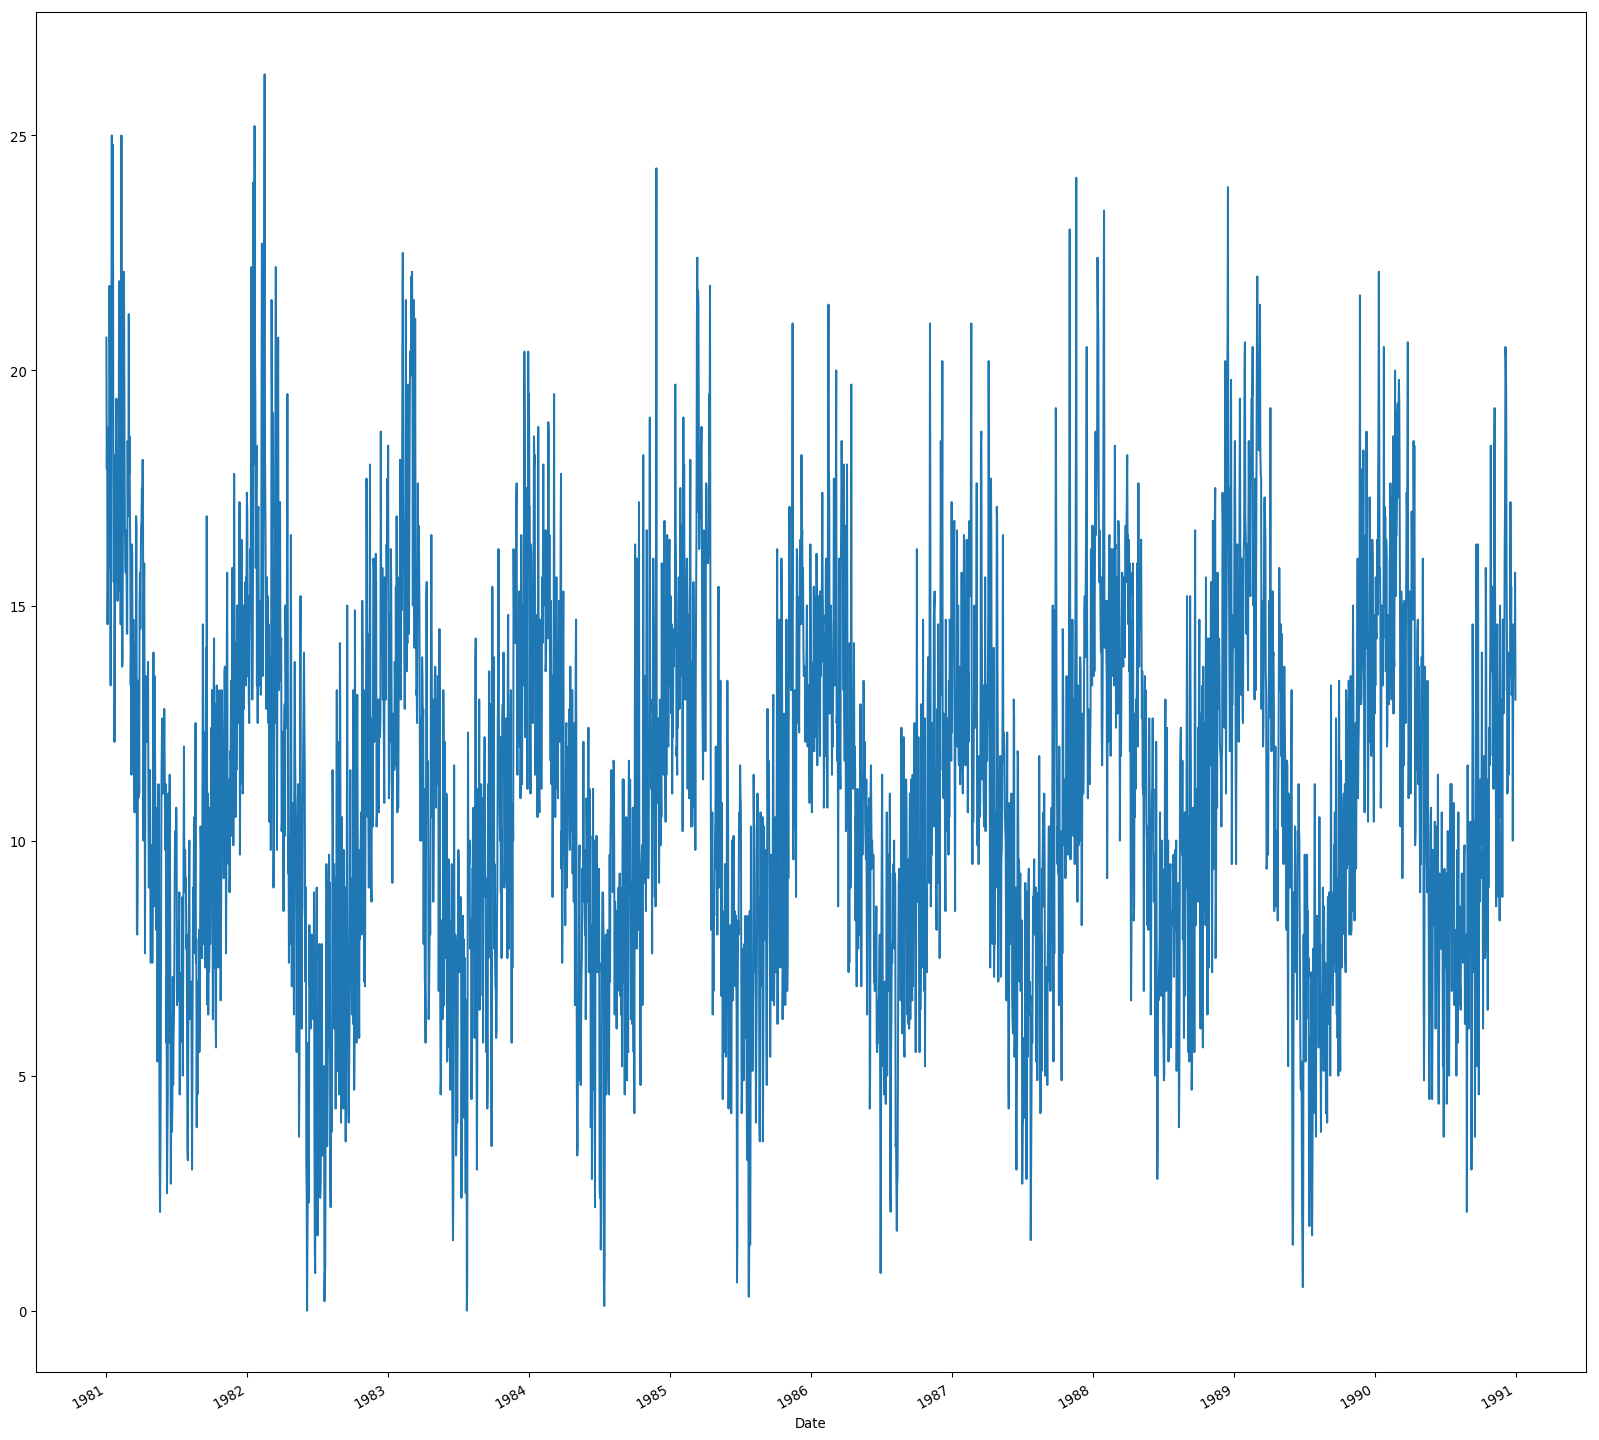

In [52]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

my_dpi = 96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

series.plot();

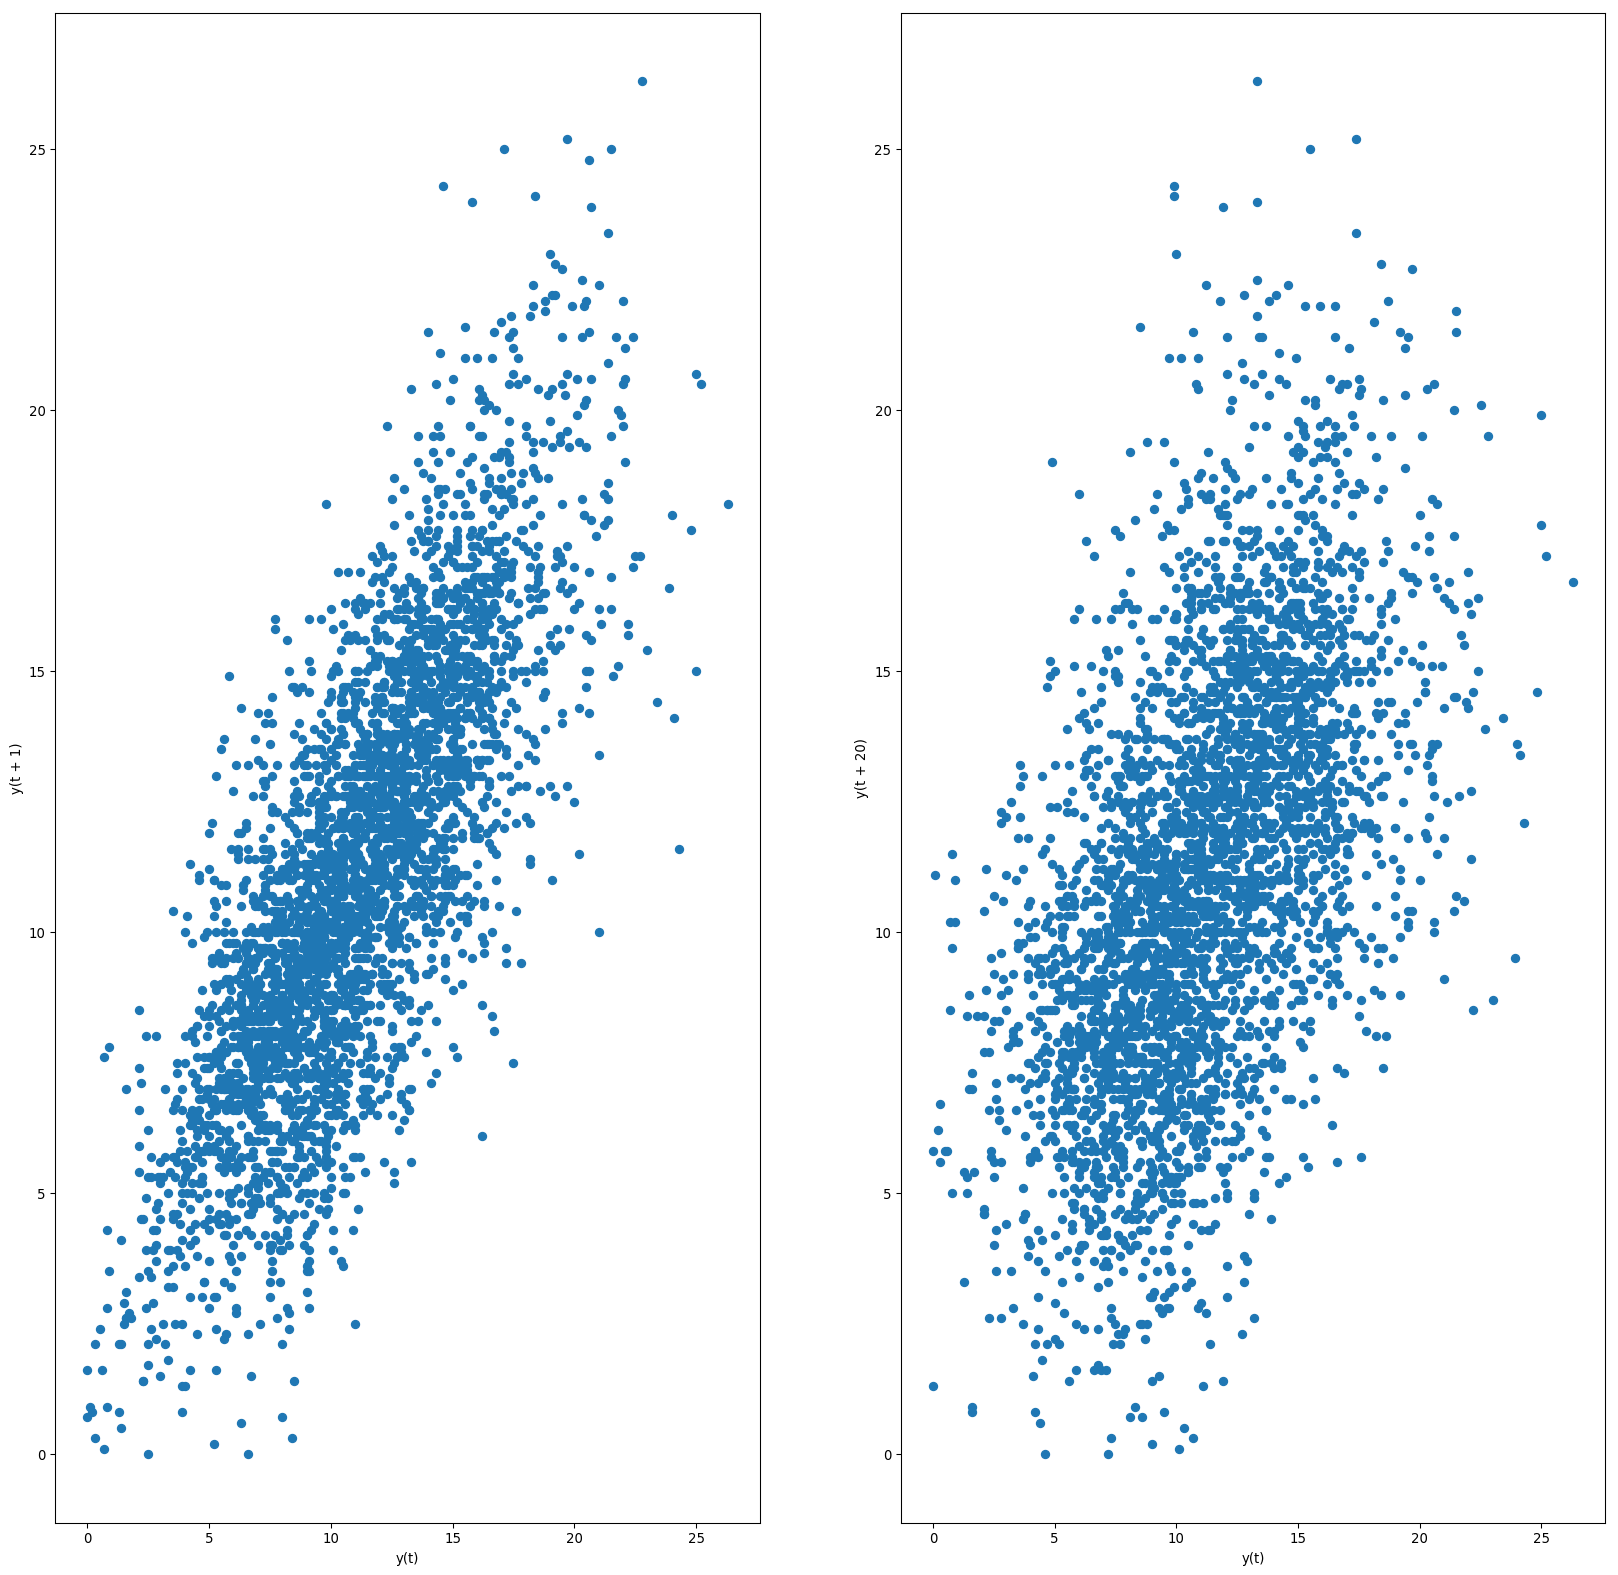

In [53]:
my_dpi = 96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

plt.subplot(1,2,1)
lag_plot(series, lag=1)

plt.subplot(1,2,2)
lag_plot(series, lag=20);

In [54]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
values = DataFrame(series.values)

dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

result = dataframe.corr()
result

C:\Users\Astra\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


,t-1,t+1
t-1,1.00000,0.77487
t+1,0.77487,1.00000


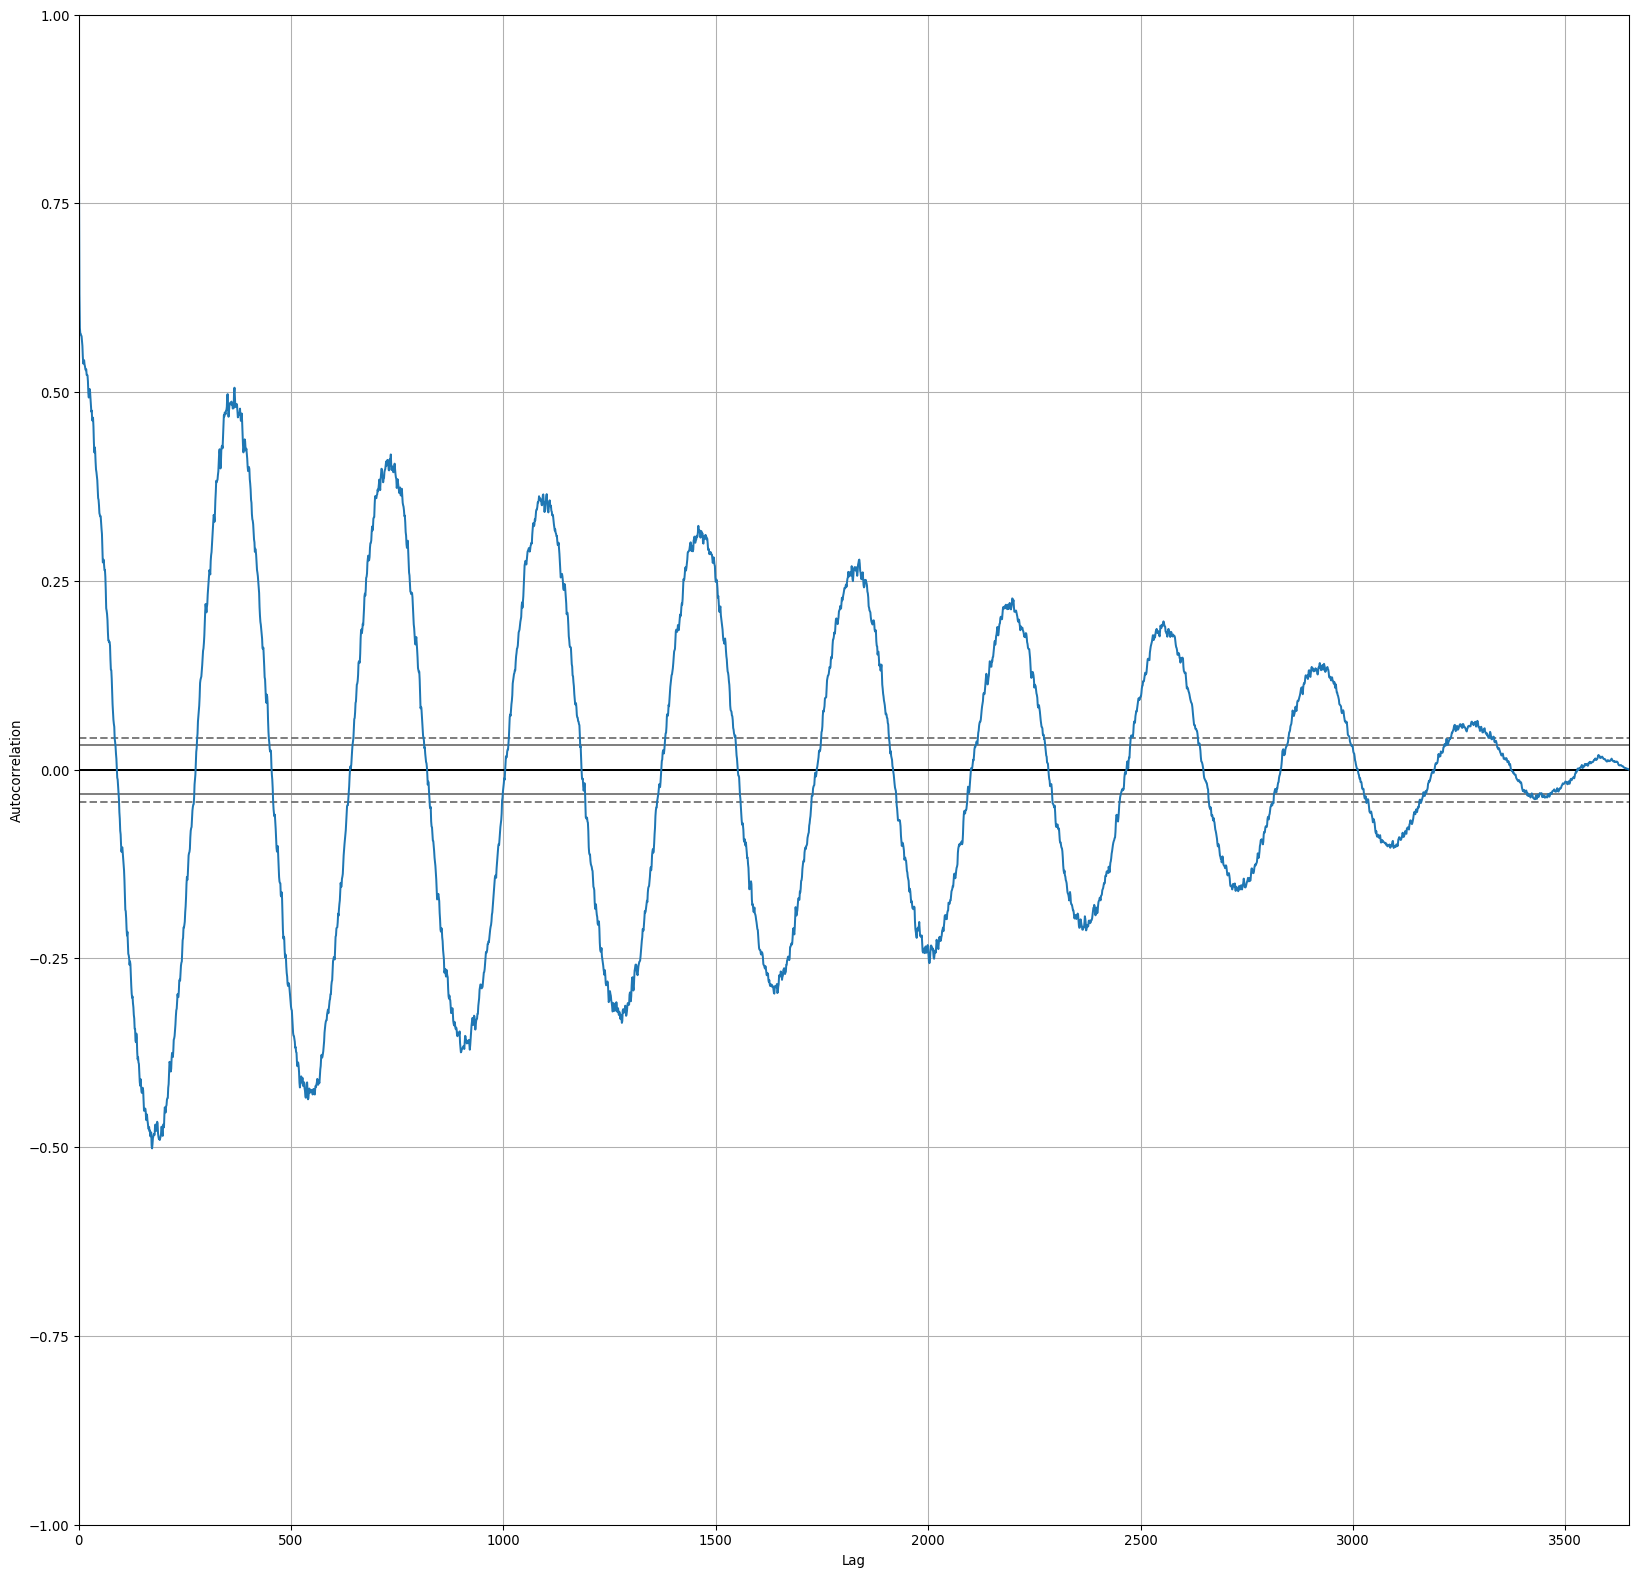

In [55]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

my_dpi = 96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
autocorrelation_plot(series);

<Figure size 2000x2000 with 0 Axes>

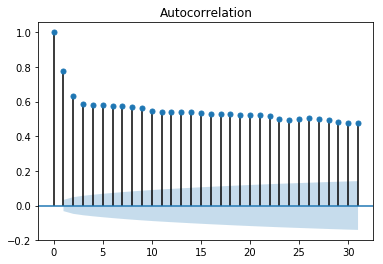

In [56]:
my_dpi = 96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
plot_acf(series, lags=31);

# Persistence Model

In [57]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

Test MSE: 3.423


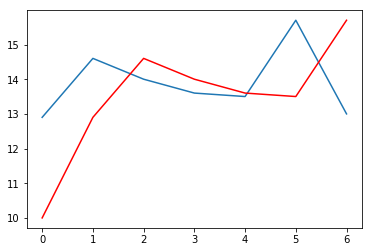

In [58]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red');

# Autoregression Model

In [59]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


C:\Users\Astra\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502


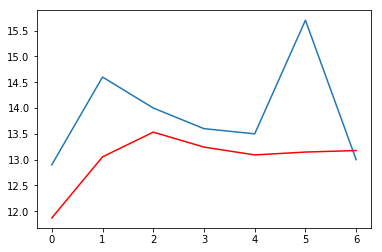

In [60]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')

In [61]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()

window = model_fit.k_ar
coef = model_fit.params

C:\Users\Astra\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test MSE: 1.451


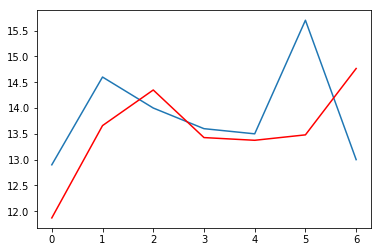

In [62]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]

predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red');